In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import sklearn 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AAPL.csv')
print(df.tail())

            Date        Open        High         Low       Close   Adj Close  \
5529  2022-11-23  149.449997  151.830002  149.339996  151.070007  151.070007   
5530  2022-11-25  148.309998  148.880005  147.119995  148.110001  148.110001   
5531  2022-11-28  145.139999  146.639999  143.380005  144.220001  144.220001   
5532  2022-11-29  144.289993  144.809998  140.350006  141.169998  141.169998   
5533  2022-11-30  141.399994  148.720001  140.550003  148.029999  148.029999   

         Volume  
5529   58301400  
5530   35195900  
5531   69246000  
5532   83763800  
5533  111224400  


In [ ]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))

5519   2022-11-09
5520   2022-11-10
5521   2022-11-11
5522   2022-11-14
5523   2022-11-15
5524   2022-11-16
5525   2022-11-17
5526   2022-11-18
5527   2022-11-21
5528   2022-11-22
5529   2022-11-23
5530   2022-11-25
5531   2022-11-28
5532   2022-11-29
5533   2022-11-30
Name: Date, dtype: datetime64[ns]


In [ ]:
#Variables for training
cols = list(df)[1:6]
print(cols) 

['Open', 'High', 'Low', 'Close', 'Adj Close']


In [ ]:
df_for_training = df[cols].astype(float)

In [ ]:
# open = df['Open'].to_numpy()

In [ ]:
# print(open[5444:])


In [ ]:
# open1 = []
# for i in range(5444,5534):
#     open1.insert(i , open[i])

In [ ]:
# print(len(open1))

In [ ]:
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


In [ ]:
#training the dataset
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (5520, 14, 5).
trainY shape == (5520, 1).


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import LSTM,Dropout
from keras.layers import Dense

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 14, 64)            17920     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=13, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/13
311/311 [==============================] - 7s 15ms/step - loss: 0.0211 - val_loss: 0.0545
Epoch 2/13
311/311 [==============================] - 4s 14ms/step - loss: 0.0090 - val_loss: 0.3262
Epoch 3/13
311/311 [==============================] - 4s 14ms/step - loss: 0.0085 - val_loss: 0.1428
Epoch 4/13
311/311 [==============================] - 5s 16ms/step - loss: 0.0077 - val_loss: 0.0647
Epoch 5/13
311/311 [==============================] - 5s 15ms/step - loss: 0.0076 - val_loss: 0.1300
Epoch 6/13
311/311 [==============================] - 4s 14ms/step - loss: 0.0073 - val_loss: 0.0480
Epoch 7/13
311/311 [==============================] - 4s 14ms/step - loss: 0.0073 - val_loss: 0.8817
Epoch 8/13
311/311 [==============================] - 4s 14ms/step - loss: 0.0064 - val_loss: 0.0387
Epoch 9/13
311/311 [==============================] - 4s 14ms/step - loss: 0.0065 - val_loss: 0.0677
Epoch 10/13
311/311 [==============================] - 5s 15ms/step - loss: 0.0059 - val_lo

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [ ]:
past = 91
days_of_pred = 90

#extract the dates for prediction
predict_period_dates = pd.date_range(list(train_dates)[-past], periods=days_of_pred, freq = us_bd).tolist()
print(predict_period_dates)

[Timestamp('2022-07-25 00:00:00', freq='C'), Timestamp('2022-07-26 00:00:00', freq='C'), Timestamp('2022-07-27 00:00:00', freq='C'), Timestamp('2022-07-28 00:00:00', freq='C'), Timestamp('2022-07-29 00:00:00', freq='C'), Timestamp('2022-08-01 00:00:00', freq='C'), Timestamp('2022-08-02 00:00:00', freq='C'), Timestamp('2022-08-03 00:00:00', freq='C'), Timestamp('2022-08-04 00:00:00', freq='C'), Timestamp('2022-08-05 00:00:00', freq='C'), Timestamp('2022-08-08 00:00:00', freq='C'), Timestamp('2022-08-09 00:00:00', freq='C'), Timestamp('2022-08-10 00:00:00', freq='C'), Timestamp('2022-08-11 00:00:00', freq='C'), Timestamp('2022-08-12 00:00:00', freq='C'), Timestamp('2022-08-15 00:00:00', freq='C'), Timestamp('2022-08-16 00:00:00', freq='C'), Timestamp('2022-08-17 00:00:00', freq='C'), Timestamp('2022-08-18 00:00:00', freq='C'), Timestamp('2022-08-19 00:00:00', freq='C'), Timestamp('2022-08-22 00:00:00', freq='C'), Timestamp('2022-08-23 00:00:00', freq='C'), Timestamp('2022-08-24 00:00:00'

In [ ]:
prediction = model.predict(trainX[-days_of_pred:])

prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

3/3 [==============================] - 0s 8ms/step


In [ ]:
print(y_pred_future)

[156.97646 156.34366 157.93666 159.03278 161.97765 162.94987 162.90884
 165.09648 166.39998 166.53049 167.11949 166.94643 168.95691 169.83258
 171.30215 172.51913 173.09793 174.16986 174.36798 173.59148 171.4883
 170.62114 170.32178 171.27847 169.65352 166.70726 165.20369 163.76393
 162.70464 162.10387 160.72946 160.37393 159.66652 160.33882 163.17006
 160.96051 159.99698 158.60658 156.85638 157.35828 158.8426  158.89915
 157.7523  156.3018  156.11346 156.41954 154.95462 151.93771 148.8694
 148.22546 149.63213 150.2069  150.4783  148.41133 147.29878 146.31133
 145.52524 145.95694 145.8535  146.38113 147.54922 147.78992 148.17377
 149.37915 151.06195 153.08128 153.2948  151.82397 154.87906 155.68443
 155.68123 153.51122 149.49785 147.55719 146.07883 146.00484 144.26482
 147.17023 149.77737 151.11043 152.76677 152.62112 153.17043 154.22981
 153.50842 153.65784 154.3433  153.48889 151.72113 149.84547]


In [ ]:
#Adding dates to forecast
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


In [ ]:
original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-7-26']


<ipython-input-168-51fa3744d004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


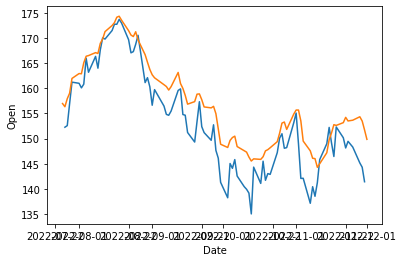

In [ ]:
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(open1, y_pred_future)